In [1]:
from TMP117 import TMP117
from MPU6050 import MPU6050
from TP import TP
from CAP11NA import CAP11NA
from BM1422 import BM1422
from SM141K import SM141K 
from helperFunctions import generateActiveList, plotTogether
import numpy as np
from generateBitstringsCopy import ArduinoConfig, readArduinoConfigs

# Model Overview
* *Purpose*: This model is to be used by teams for the GLEE 2022 workshop
* *Output*: The output of this model will be a plot of each sensor's power/data output vs time as well as a plot with all the sensor outputs in a single plot
* *Role of Teams*: Learn about the different sensors, set different modes for each sensor, and plot power and data outputs. At the very end of the model, after they've learned about the different modes for each sensor, the teams will set the LunaSat configurations.

### Table of Contents: 
* How to use Jimmy
* Temperature Configurations
* Accelerometer Configurations
* Thermopile Configurations
* Capacitor Configurations
* Magnetometer Configurations
* Solar Model
* Plots of all sensor power and data outputs
* Setting LunaSat Configurations

***  

# How To Use Jimmy

Welcome to Jimmy, an interactive model of the individual sensors on a LunaSat. Jimmy's main goal is to measure the power and data rates of different sensor mode configurations.

Sensors are defined as a class object each with customizable parameters. Changing these parameters can change the way your LunaSat behaves, such as taking more measurements and collecting more data, or going into low power mode and saving resources.

To demonstrate how to change configurations of modes on our simulated LunaSat, we will go through an example starting with the temperature sensor.
We need to be sure to pass the right values in to our object! Lets do that below.

Lets go through this code line by line and take a look at what we need to change.   

```exampleDuration``` controls how long the plotting function goes for. ```exampleTimestep``` controls how the plot looks. You can play around with both of these, but try to set a duration of 1000 at max and a timestep between 0 and 1 in order for the plots to show up correctly.  

```ModesExample``` is an array that represents all the modes that our sensor will contain and cycle through. It also contains the duration each mode is active for. You can add as many modes as you wish. In this case, we will use "CC_32_16" for 15 seconds, then "OS_64_1" for 15 seconds, then "OS_32_0.0155" for 40 seconds (these are different modes of the temperature sensor, you'll learn more about them in the next section), as so on. In the next section, there will be more description of these modes so you won't need to know exactly what these modes are quite yet.

**How to add more modes:**
- You will need to modify the ```ModesExample``` array
- [ ("CC_32_16",50), ("OS_64_1",90), ("OS_32_0.0155",40), ("OFF_0_0",100), *(add new mode here, add new duration here)* ]

In [2]:
exampleDuration = 1000 # Duration controls how long all of the sensors are active for
exampleTimestep = 1 # time_step controls the distance between data values. 
ModesExample = [("CC_32_16",50), ("OS_64_1",90), ("OS_32_0.0155",40), ("OFF_0_0",100)] # user can add modes here

```active_times``` is an array that represents the modes and duration for each mode that we set in ```ModesExamples```. Basically, we are continuously looping through all the modes in ```ModesExamples``` until the ```exampleDuration``` is reached. All you need to know for now is that you'll need this for plotting data, which will be done in the next section.  

Finally, ```tmp``` is our sensor object, which contains the plotting function plot we will use to show the graphs of data and power over time. We will pass necessary variables to this object.  

```power_tmp```, ```data_tmp```, and ```time_tmp``` are variables returned by a function within our sensor class called runSim(). This function also returns the power, data, and time information that we will use later on to combine the information and generate plots for ALL the sensors. plot=True will call the plotting function whereas plot=False will not. 

Description of the plots:  
The first figure of the three figures below shows when each mode is active (a solid line that corresponds to the time when it is active). The second figure plots the average power for the tmp sensor and the third figure plots the average data. For other sensors that you will mess with later (this is just a demo), the y-axis of the plots will be labeled accordingly. The x-axis is the time in seconds.


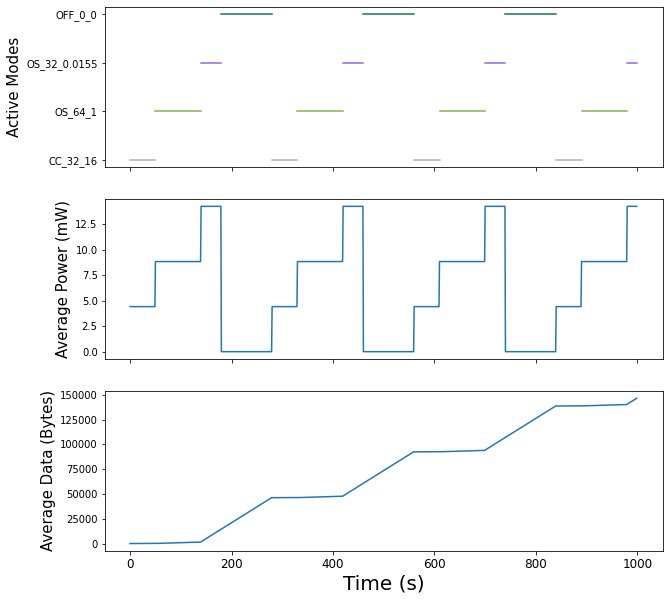

In [3]:
active_times = generateActiveList(exampleDuration, ModesExample) # cycling through the list of modes repeatedly
tmp = TMP117(exampleTimestep, exampleDuration, active_times, loop_rate=20) # we pass in the things we need in order to generate our plots
power_tmp, data_tmp, time_tmp= tmp.runSim(plot=True) # calling our function to plot and return the variables (we will use these variables later)

Beautiful! Feel free to play around with different durations of each mode to see how the plot changes.  
Now that you have had a brief introduction, take care to read through the descriptions of each sensor then jump right in to making and plotting your own configurations for each sensor!
***

# `Set duration and timestep `


In [4]:
# set the duration and timestep for your plots here
duration = 1000
time_step = 0.1

***  
# `Temperature Sensor Configurations`
### General Description:
* "The TMP117 is a high-precision digital temperature sensor"
* It provides a 16-bit temperature result with accuracy of up to $\pm 0.1 ^{\circ}C$ and resolution of $\pm 0.0078 ^{\circ}C$. 
* TMP117 has a programmable EEPROM (electrically erasable programmable read-only memory) and has 48-bits of memory available for general use  

**Important terms to be defined**:  
* Temperature Conversion: the temperature sensor isn't really converting anything, the term temperature conversion just means the result that was sampled from the temperature sensor 
* Selectable Averaging : allows users to configure the device to report the average of multiple temp results. This means that the temperature sensor accumulates the results sampled and reports the average of all those results at the end of each conversion cycle. The possible averaging options are 0, 8, 32, or 64 averages. 
* The default TMP117 setting from startup is 8 averages and a conversion cycle of 1s


Temperature sensor has two different modes called Continuous Conversion (CC) and One Shot (OS) mode:  
| Modes | Description | Power (mW) | Input String| Params |
|---|---|---|---|---|
| OS One-Shot Mode | After the device completes a one-shot conversion (temperature conversion), the device goes to the low-power shutdown mode. For OS mode, the conv cycle time is the active time so the possible conv cycle times are only 0.0155, 0.125, 0.5, 1 since there is no standby. ||OS_x_y (x is a placeholder for possible averaging inputs, y is a placeholder for possible conversion cycle times)| Possible averaging inputs: 0, 8, 32, 64  -- Possible conversion cycle times: 0.0155, 0.125, 0.5, 1 | 
| CC Continuous Conversion Mode | The device continuously performs temperature conversions in this mode, as shown in Table, and updates the temperature result register at the end of every active conversion.  The total conversion cycle includes the active conversion time and standby time. |0.004 - | CC_x_y  (x is a placeholder for possible averaging inputs, y is a placeholder for possible conversion cycle times) | Possible averaging inputs: 0, 8, 32, 64 -- Possible conversion cycle times: 0.0155, 0.125, 0.25, 0.5, 1, 4, 8, 16 |  

|Default TMP config: CC_8_1|Turn off temperature sensor : OFF_0_0|  
|---|---|

For additional information on temperature sensor:  
https://www.ti.com/lit/ds/symlink/tmp117.pdf?ts=1656974490603&ref_url=https%253A%252F%252Fwww.ti.com%252Ftechnologies%252Finternet-of-things%252Foverview.html 

In [5]:
''' TO-DO: ADD OR CHANGE MODES HERE (you may add and delete modes as you wish) '''
ModesTMP = [("CC_8_1",15), ("OFF_0_0",10)]

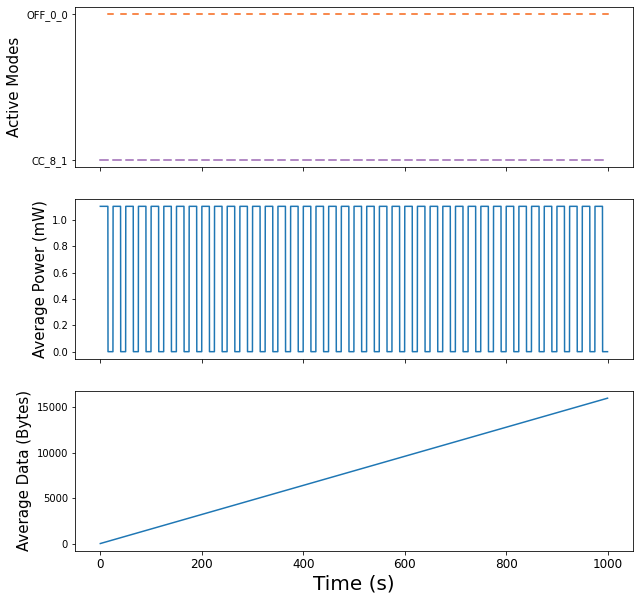

In [6]:
active_list = generateActiveList(duration, ModesTMP)
tmp = TMP117(time_step, duration, active_list, loop_rate = 20)
power_tmp, data_tmp, time_tmp= tmp.runSim(plot=True);

*** 

# `Accelerometer Configurations`

MPU6050 description:
- Gyroscope operating current: 3.6 mA
- Accelerometer operating current: 500 µA
    * Low power accelerometer mode current: 10µA at 1.25Hz, 20µA at 5Hz, 60µA at 20Hz, 110µA at
40Hz
- Everything enabled: 3.9 mA
- 16-bit registers for storing accelerometer/ gyroscope data, one per axis for each.
- 1024 byte FIFO buffer allowing reading/ writing data from registers.
- Temperature range is -40 to 85 °C

Modes:
The accelerometer has 9 different modes to choose from, with different capabilites, power usage, and data usage.

| Mode | Description | Power (mW) | Data (bytes/s) | Input string | Notes | 
|---|---|---|---|---|---| 
| Low power wakeup (x) | Wake the sensor to take a single accelerometer sample  at a given frequency given by x. Options include x=1.25, 5, 20, 40. | 0.033-0.462 | 7.5-640 | "low_power_wakeup_x" | Power and data increases with wakeup frequency. |
| Accelerometer only | Only use the accelerometer. | 1.65 | 6,000 | "accelerometer_only" | N/A | 
| Gyroscope only | Only use the gyroscope. | 11.88 | 48,000 | "gyroscope_only" | N/A |
| Accelerometer and Gyroscope | Both accelerometer and gyroscope. | 12.54 | 12,000 | "gyroscope_accelerometer" | The gyroscope and accelerometer take samples at different rates. The data value assumes a sample rate of the accelerometer, 1 kHz. | 
| Sleep | Does nothing. | 0.0165 | 0 | "sleep" | N/A |

*Power assumes a voltage of 3.3v, data assumes there are no bottlenecks such as loop rate.

Parameters:
- **digital low pass:** configures the digital low pass filter settings on the sensor. Setting digital_low_pass to 1 changes the output rate, 8kHz when 0 and 1kHz when 1.
- **sample rate divisor:** is a parameter to lower the sampling rate of the sensor. This value ranges from 0 to 255, and is used in the equation below.
    * Sample Rate = Gyroscope Output Rate / (1 + SMPLRT_DIV)
    * Note: gyroscope output rate changes if the digital low pass filter is on or not, 1kHz when on and 8kHz when off.
- **loop rate:** is a hypothetical bottleneck to the measuring rate of the sensor; it represents the loop rate of the LunaSat code.

In [7]:
''' TO-DO: ADD OR CHANGE MODES HERE (you may add and delete modes as you wish) '''
ModesACC = [("low_power_wakeup_1.25_1_255",50), ("gyroscope_accelerometer_0_75",40), ("accelerometer_only_0_90", 20), ("low_power_wakeup_1.25_1_255",50)]

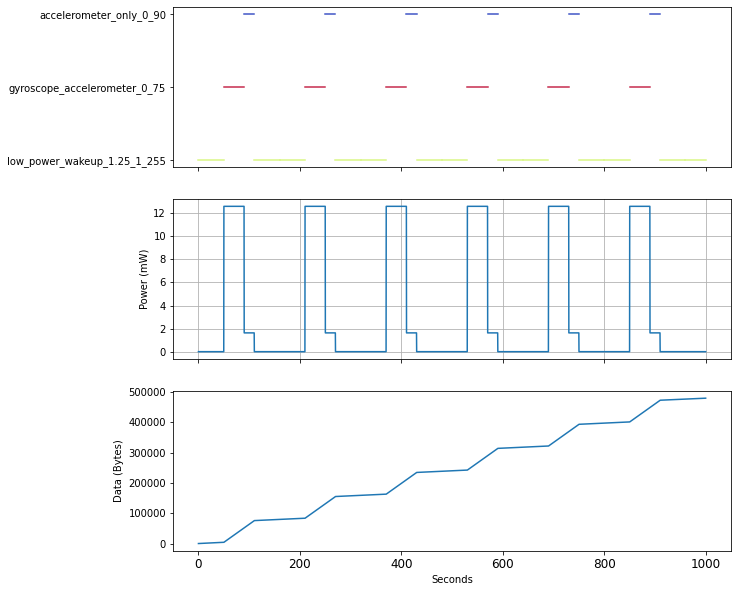

In [8]:
# REMEBER TO TAKE OUT DMP FROM MODES. DMP IS CURSED AND WE DONT LIKE HIM.
accelerometer = MPU6050(time_step=time_step, duration=duration, loop_rate=20)
active_times = generateActiveList(total_time=duration, modelist=ModesACC)
time_acc, power_acc, data_acc = accelerometer.runSim(active_times)

***

# `Thermopile Configurations`

The args we pass in to the function is the time_step and duration. As with the active times, we pass in what mode we want the sensro to run on as well as the times we want it to be active. The two possible modes are "TP_only" and "TP_off"

In [9]:
''' TO-DO: ADD OR CHANGE MODES HERE (you may add and delete modes as you wish) '''
ModesThermo = [("TP_only",20), ("TP_off",20), ("TP_only",20)]

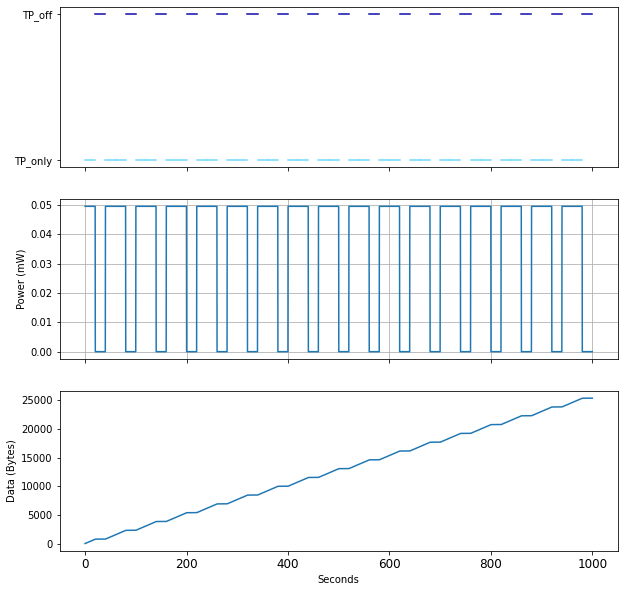

In [10]:
Thermo = TP(time_step, duration, loop_rate=20)
active_times = generateActiveList(total_time=duration, modelist=ModesThermo)
tp_time, tp_power, tp_data = Thermo.runSim(active_times)

***

# `Capacitor Configurations`

CAP11NA description:
- We don't have a ton of info on this one. Citation needed?

In [11]:
''' TO-DO: ADD OR CHANGE MODES HERE (you may add and delete modes as you wish) '''
ModesCapacitor = [("on",10)] 

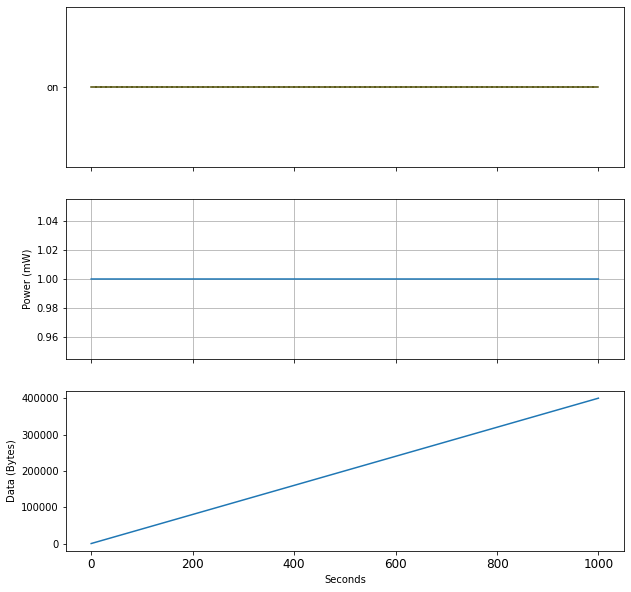

In [12]:
cap = CAP11NA(loop_rate=20, duration=duration, time_step=time_step)
cap_active_times = generateActiveList(total_time=duration, modelist=ModesCapacitor)
cap_time, cap_power, cap_data = cap.runSim(cap_active_times)

***

# `Magnetometer Configurations`

BM1422 description:
- 0.15 mA operating current at 100SPS.
- Operating temperature -40 to 85 °C
- things?

Modes:
- The sensor supports different output rates for measuring, the options aer 10Hz, 20Hz, 100Hz, and 1kHz. These only change the amount of data collected, not the power. 
- There are continous and single modes, however the documentation for these is not great.


In [13]:
''' TO-DO: ADD OR CHANGE MODES HERE (you may add and delete modes as you wish) '''
ModesMagnetometer = [("1000",10), ("standby",10),("10",40)] # for magnetometer, the certain mode is the timing specification, or standby.

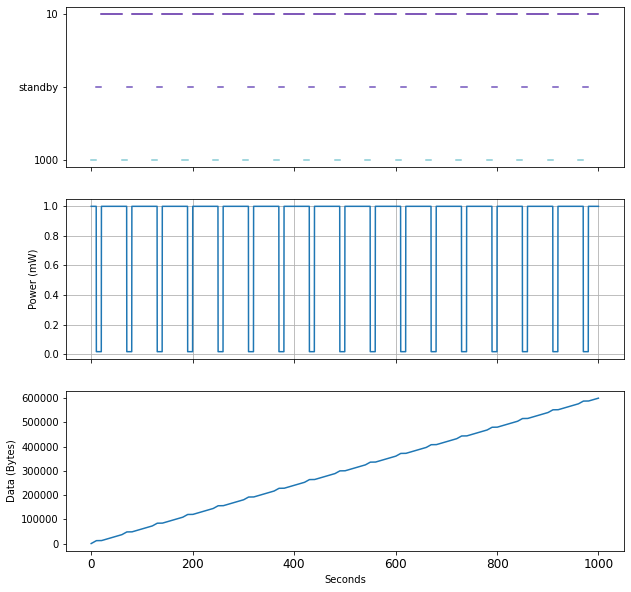

In [14]:
foo = BM1422(loop_rate=20, duration=duration, time_step=time_step)
mag_activetimes = generateActiveList(total_time=duration, modelist=ModesMagnetometer)
mag_time, mag_power, mag_data = foo.runSim(mag_activetimes)

***

# `Solar Panel Model`

The solar model shows the amount of available power throughout a lunar day. 

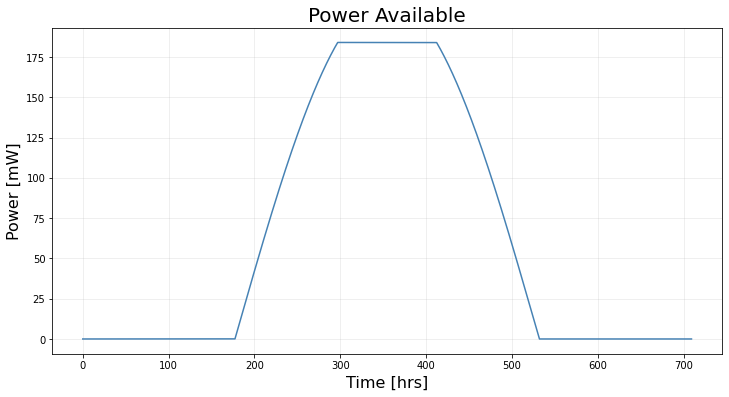

In [15]:
# the solar model plots the power available in a lunar day
solar_panel_model = SM141K(start_time_hrs=0, duration_hrs=709, time_step_seconds=30, latitude=45)
solar_panel_model.plotPowerAvailable()

***  
# `All Together`

In this section, we will compute the total power and total data for each active period by combining the power and data arrays of each sensor. We will then plot the total power and data against time. Notice how the accelerometer is the sensor that uses the most power. The magnetometer sensor consumes the most data. The solar model plots the power available at a given time. The blue shaded region is where there is enough power to power the LunaSat.

In [16]:
chip_pow = 20 # power used by ATMega (microprocessor)

total_pow = power_tmp + mag_power + power_acc + cap_power + tp_power + chip_pow # computing total power for all sensors
total_data = data_tmp + mag_data + data_acc + cap_data + tp_data # computing total data for all sensors

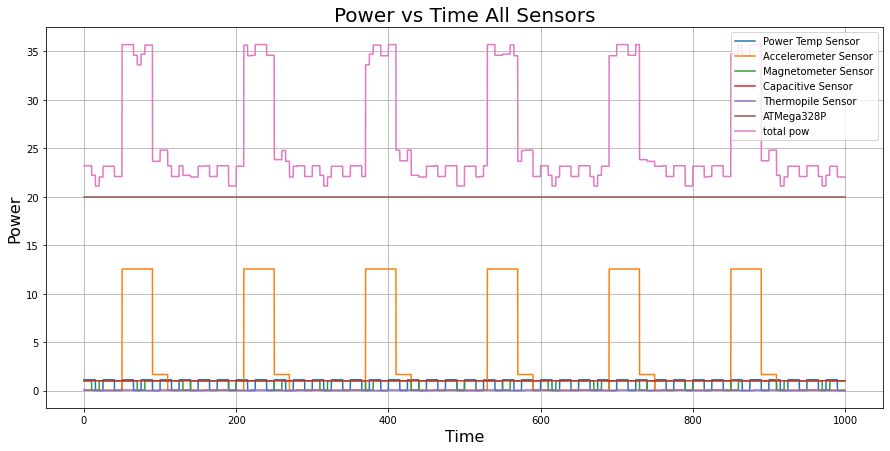

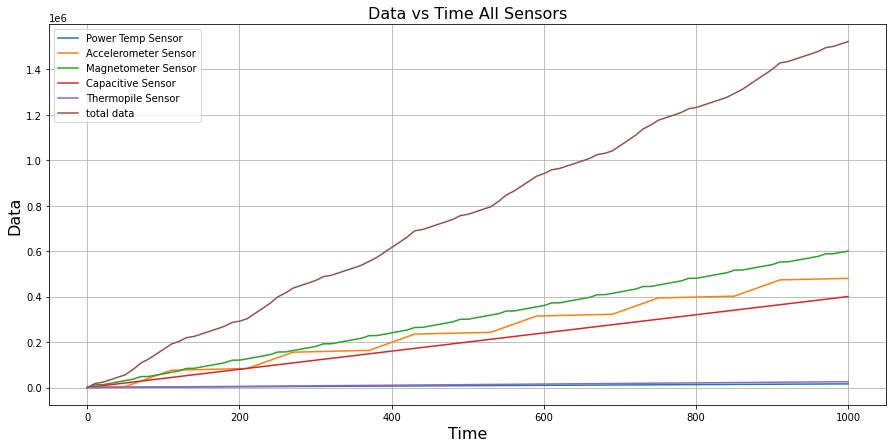

In [17]:
plotTogether(time_tmp, time_acc, tp_time, cap_time, mag_time, tp_power, power_tmp, power_acc, mag_power, cap_power, data_tmp, data_acc, mag_data, cap_data, tp_data, total_pow, total_data, chip_pow)

[196.44166666666666, 512.5583333333333]

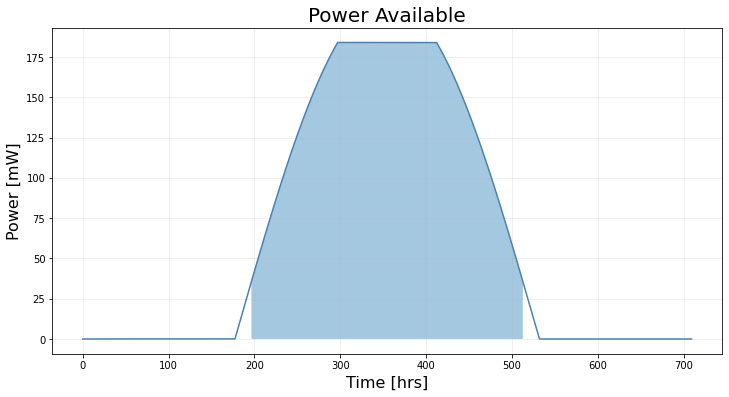

In [18]:
# The model shows the times in the shaded region where the solar panel produces enough power for the LunaSat with the given modes for each sensor

max_power_used = max(total_pow)
solar_panel_model.plotPowerAndTimesPossible(max_power = max_power_used)

***
# `SETTING ARDUINO CONFIGS`

In this section, you will set configurations for the sensors that will actually be coded in arduino. A single configuration contains all the sensors and the mode that was set for that sensor. It also contains the duration (how long sensors are active) for that configuration. You can create a maximum of 5 separate configurations. Feel free to copy and paste variables, but be sure to change the names to reflect the config.

#### EXAMPLE CONFIG: 
Below is an example of a config. Prefix needs to be set in each variable name in order to differentiate between the configurations. For example, the first configuration is 1, the next configuration is 2, and so on. 

In [19]:
config_duration_prefix = 10 # seconds
tmp_mode_prefix = "CC_32_16"
acc_mode_prefix = "low_power_wakeup_1.25_1_255"
thermopile_mode_prefix = "TP_only"
capacitor_mode_prefix = "off"
magnetometer_mode_prefix = "standby"
config_prefix = [tmp_mode_prefix, acc_mode_prefix, thermopile_mode_prefix, capacitor_mode_prefix, magnetometer_mode_prefix, config_duration_prefix]

#### SET CONFIGS BELOW (max of 5 configs total):

In [20]:
# CONFIGURATION 1:
config_duration_1 = 10 # seconds
tmp_mode_1 = "CC_32_16"
acc_mode_1 = "low_power_wakeup_1.25_1_255"
thermopile_mode_1 = "TP_only"
capacitor_mode_1 = "off"
magnetometer_mode_1 = "standby"
config_1 = [tmp_mode_1, acc_mode_1, thermopile_mode_1, capacitor_mode_1, magnetometer_mode_1, config_duration_1]

# CONFIGURATION 2:
config_duration_2 = 10 # seconds
tmp_mode2 = "CC_32_16"
acc_mode2 = "accelerometer_only_0_90"
thermopile_mode2 = "TP_off"
capacitor_mode2 = "on"
magnetometer_mode2 = "1000"
config_2 = [tmp_mode2, acc_mode2, thermopile_mode2, capacitor_mode2, magnetometer_mode2, config_duration_2]

# CONFIGURATION 3:
config_duration_3 = 10 # seconds
tmp_mode_3 = "CC_32_16"
acc_mode_3 = "accelerometer_only_0_90"
thermopile_mode_3 = "TP_off"
capacitor_mode_3 = "on"
magnetometer_mode_3 = "1000"
config_3 = [tmp_mode_3, acc_mode_3, thermopile_mode_3, capacitor_mode_3, magnetometer_mode_3, config_duration_3]

In [21]:
# ADD CONFIGURATIONS TO ARRAY
configurations = [config_1, config_2, config_3] # add config names here  

In [22]:
team_name = 'EXAMPLE_ARDUINO_CONFIGS' # SET YOUR TEAM NAME HERE

In [23]:
ArduinoConfig(configurations, team_name) # GENERATE BITSTRINGS FOR VALID MODES

In [24]:
readArduinoConfigs(team_name) # PRINTING CONFIG INPUTS THAT YOU GENERATED

#DEFINE MODE_0 133299993
#DEFINE DURATION_0 10

#DEFINE MODE_1 133192279
#DEFINE DURATION_1 10

#DEFINE MODE_2 133192279
#DEFINE DURATION_2 10


